In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Here i imported file from my local disk
df= pd.read_csv(r"C:/Users/hp/OneDrive/Desktop/CDAC-DBDA/2024/Internship/prodigy_infotech/task2/titanic.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.shape

(891, 12)

In [9]:
df.describe()## Checking Mean Median values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Checking Null Values
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we have found null values in three columns

In [12]:

# Fill missing values in 'Age' with median age
df['Age'].fillna(df['Age'].mean(), inplace=True)
# Fill missing values in 'Embarked' with the most common port
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
     

In [14]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
# Function to add counts on bars
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
     

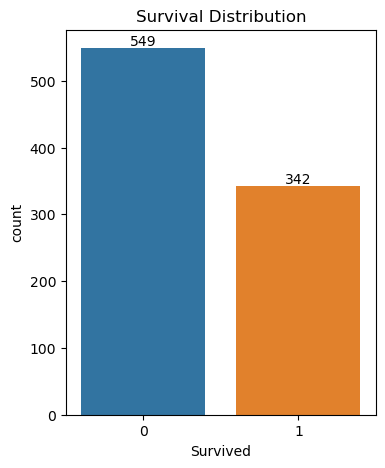

In [22]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x=df['Survived'])
add_counts(ax)
plt.title('Survival Distribution')
plt.show()

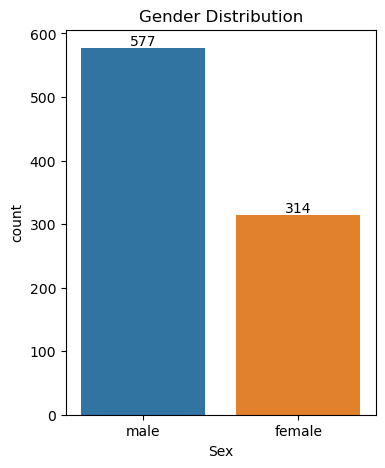

In [24]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x='Sex', data=df)
add_counts(ax)
plt.title('Gender Distribution')
plt.show()
     

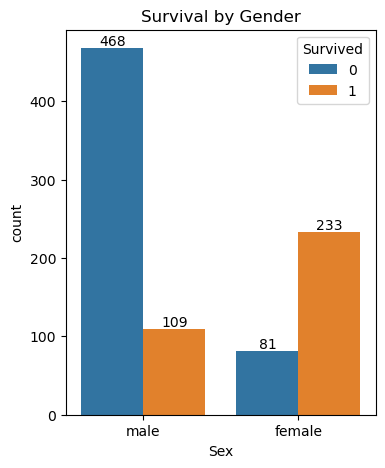

In [25]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x='Sex',hue='Survived',data=df)
add_counts(ax)
plt.title('Survival by Gender')
plt.show()

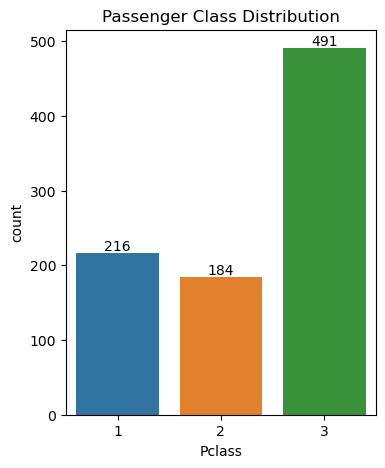

In [27]:
# Count plot for categorical variables
plt.figure(figsize=(4,5))
ax = sns.countplot(x='Pclass', data=df)
add_counts(ax)
plt.title('Passenger Class Distribution')
plt.show()

In [28]:
df['Pclass']=df['Pclass'].map({1:'Upper',2:'Middle',3:'Lower'})

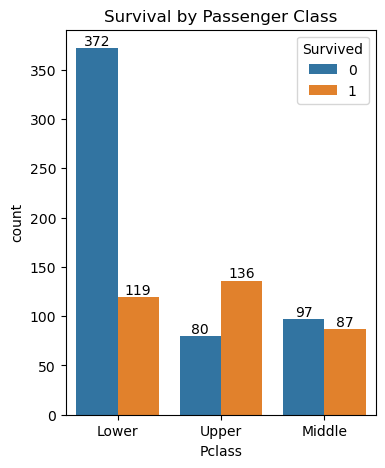

In [29]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x='Pclass',hue='Survived',data=df)
add_counts(ax)
plt.title('Survival by Passenger Class')
plt.show()

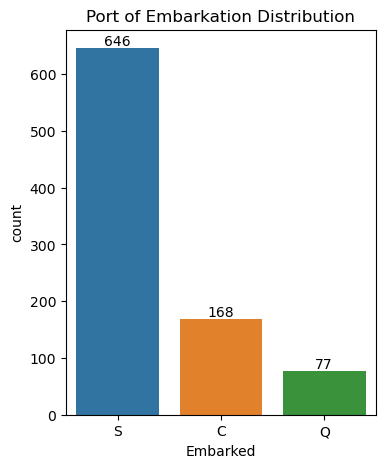

In [30]:

plt.figure(figsize=(4,5))
ax = sns.countplot(x='Embarked', data=df)
add_counts(ax)
plt.title('Port of Embarkation Distribution')
plt.show()

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Lower,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,Lower,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,Lower,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Middle,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,Upper,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,Lower,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,Upper,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [32]:
df['Embarked']=df['Embarked'].map({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'})

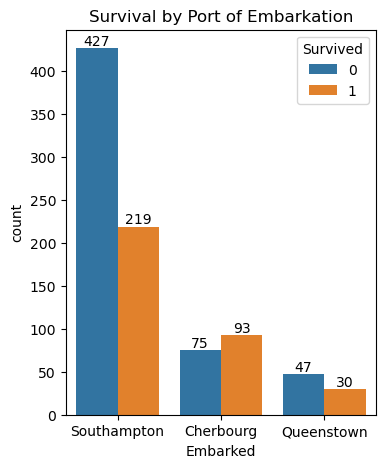

In [33]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x='Embarked',hue='Survived',data=df)
add_counts(ax)
plt.title('Survival by Port of Embarkation')
plt.show()

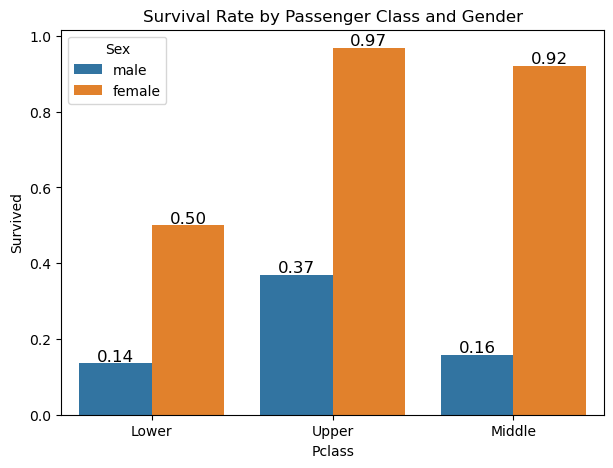

In [34]:
# Survival rate by passenger class and gender
plt.figure(figsize=(7, 5))
ax = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ci=None)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Survival Rate by Passenger Class and Gender')
plt.show()